# CompBayes: Report02

## Uma Desai

MIT License: https://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint
import thinkplot

/home/udesai/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# #1. Improving Reading Ability
## This problem is from Think Bayes, second edition by Allen Downey.

From DASL(http://lib.stat.cmu.edu/DASL/Stories/ImprovingReadingAbility.html)

> An educator conducted an experiment to test whether new directed reading activities in the classroom will help elementary school pupils improve some aspects of their reading ability. She arranged for a third grade class of 21 students to follow these activities for an 8-week period. A control classroom of 23 third graders followed the same curriculum without the activities. At the end of the 8 weeks, all students took a Degree of Reading Power (DRP) test, which measures the aspects of reading ability that the treatment is designed to improve.

> Summary statistics on the two groups of children show that the average score of the treatment class was almost ten points higher than the average of the control class. A two-sample t-test is appropriate for testing whether this difference is statistically significant. The t-statistic is 2.31, which is significant at the .05 level.



I'll use Pandas to load the data into a DataFrame.

In [42]:
import pandas as pd

df = pd.read_csv('drp_scores.csv', skiprows=13, delimiter='\t')
df.head()

,Treatment,Response
0,Treated,24
1,Treated,43
2,Treated,58
3,Treated,71
4,Treated,43


And use `groupby` to compute the means for the two groups.

In [43]:
grouped = df.groupby('Treatment')
for name, group in grouped:
    print(name, group.Response.mean())

Control 41.5217391304
Treated 51.4761904762


The `Normal` class provides a `Likelihood` function that computes the likelihood of a sample from a normal distribution.

In [44]:
from scipy.stats import norm

class Normal(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: sequence of test scores
        hypo: mu, sigma
        """
        mu, sigma = hypo
        likes = norm.pdf(data, mu, sigma)
        return np.prod(likes)

The prior distributions for `mu` and `sigma` are uniform.

In [45]:
mus = np.linspace(20, 80, 101)
sigmas = np.linspace(5, 30, 101)

I use `itertools.product` to enumerate all pairs of `mu` and `sigma`.

In [46]:
from itertools import product

control = Normal(product(mus, sigmas))
data = df[df.Treatment=='Control'].Response
control.Update(data)

1.791883192150766e-44

After the update, we can plot the probability of each `mu`-`sigma` pair as a contour plot.

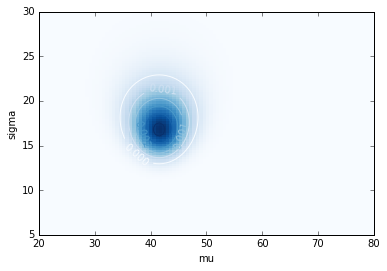

In [47]:
thinkplot.Contour(control, pcolor=True)
thinkplot.Config(xlabel='mu', ylabel='sigma')

And then we can extract the marginal distribution of `mu`

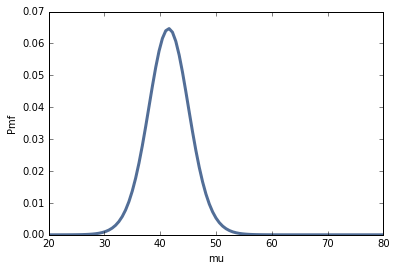

In [48]:
pmf_mu0 = control.Marginal(0)
thinkplot.Pdf(pmf_mu0)
thinkplot.Config(xlabel='mu', ylabel='Pmf')

And the marginal distribution of `sigma`

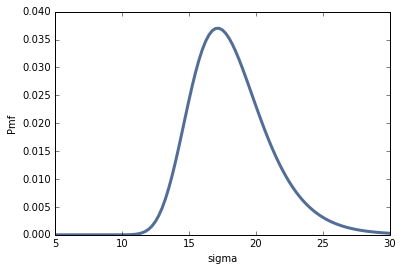

In [49]:
pmf_sigma0 = control.Marginal(1)
thinkplot.Pdf(pmf_sigma0)
thinkplot.Config(xlabel='sigma', ylabel='Pmf')

**Exercise:** Run this analysis again for the treated group.

In [50]:
treated = Normal(product(mus, sigmas))
data = df[df.Treatment=='Treated'].Response
treated.Update(data)

4.5285690956159087e-37

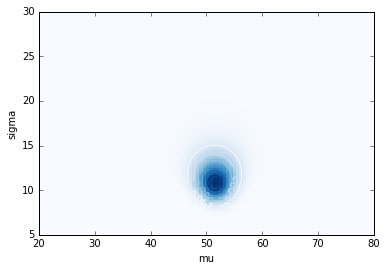

In [51]:
thinkplot.Contour(treated, pcolor=True)
thinkplot.Config(xlabel='mu', ylabel='sigma')

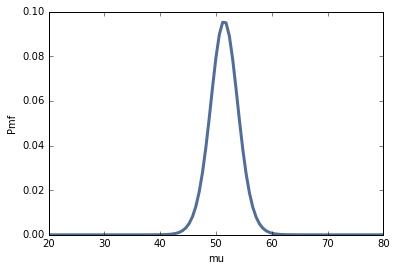

In [52]:
pmf_mu1 = treated.Marginal(0)
thinkplot.Pdf(pmf_mu1)
thinkplot.Config(xlabel='mu', ylabel='Pmf')

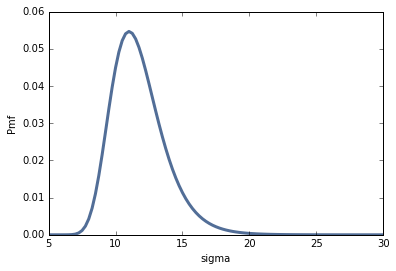

In [53]:
pmf_sigma1 = treated.Marginal(1)
thinkplot.Pdf(pmf_sigma1)
thinkplot.Config(xlabel='sigma', ylabel='Pmf')

**Exercise:** What is the distribution of the difference between the groups?

9.9544130889408731

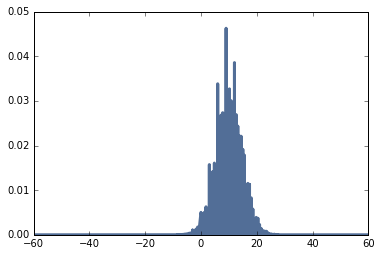

In [54]:
mu_difference = pmf_mu1 - pmf_mu0
thinkplot.Pdf(mu_difference)
mu_difference.Mean()

** Exercise:** What is the probability that the average "reading power" for the treatment group is higher?

0.98047902518732588

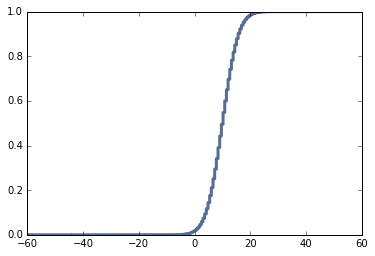

In [55]:
thinkplot.Cdf(mu_difference.MakeCdf())
# probability that the difference in mean rp is greater than 0
1 - mu_difference.MakeCdf()[0]

**Exercise:** What is the probability that the variance of the treatment group is higher?

-6.4171713281721887

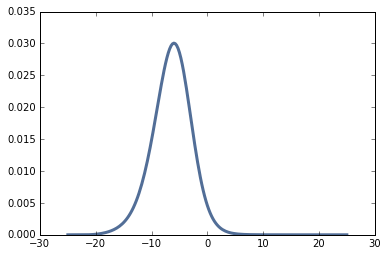

In [56]:
sigma_difference = pmf_sigma1 - pmf_sigma0
thinkplot.Pdf(sigma_difference)
sigma_difference.Mean()

0.026887481110575595

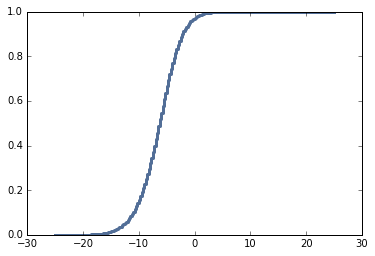

In [57]:
thinkplot.Cdf(sigma_difference.MakeCdf())
# probability that the difference in variance is greater than 0
1 - sigma_difference.MakeCdf()[0]